In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
name = None

In [ ]:
%%time
'''#for i in range(1,44):
 #   name = str(i) +".png"
    img = cv.imread("1.png",0)
    plt.imshow(img,cmap='gray')
    plt.show()
    ret,thresh1 = cv.threshold(img,230,255,cv.THRESH_BINARY_INV)
	#Applying Canny Edge Detection
    edged = cv.Canny(thresh1, 50, 200)
	

					



	#Finding Contours 
    cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
		


	#Sorting the Contours in decreasing order because Square containing the Maze is largest
    cnts = sorted(cnts, key = cv.contourArea, reverse = True)
    for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.05 * peri, True)
        #0.02
		
	# If length is 4 then it is ROI
        if len(approx) == 4:
            screenCnt = approx
            break
    pts = screenCnt.reshape(4, 2)

	#creating Array of Zero of Size(4,2)	
    rect = np.zeros((4, 2), dtype = "float32")
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    (tl, tr, br, bl) = rect
    maxWidth = 1280



	#Findinf Maximum height

	
    maxHeight = 1280

	#Destination Array of ROI
	

    dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")


	#Applying perspective transform
    M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
    warped_img = cv.warpPerspective(img, M, (maxWidth, maxHeight))
    plt.imshow(warped_img,cmap='gray')
    plt.show()
'''


In [28]:
%%time
img = cv.imread("1.png",0)
ret,thresh1 = cv.threshold(img,230,255,cv.THRESH_BINARY_INV)
	#Applying Canny Edge Detection
edged = cv.Canny(thresh1, 50, 200)
	

					



	#Finding Contours 
cnts = cv.findContours(edged,cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
		
print(len(cnts))


	#Sorting the Contours in decreasing order because Square containing the Maze is largest
cnts = sorted(cnts, key = cv.contourArea, reverse = True)
for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.05 * peri, True)
        #0.02
		
	# If length is 4 then it is ROI
        if len(approx) == 4:
            screenCnt = approx
            break
pts = screenCnt.reshape(4, 2)

	#creating Array of Zero of Size(4,2)	
rect = np.zeros((4, 2), dtype = "float32")
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
(tl, tr, br, bl) = rect


	#Destination Array of ROI
	

dst = np.array([[0, 0],[1280, 0],[1280,1280],[0,1280]], dtype = "float32")


	#Applying perspective transform
M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
warped_img = cv.warpPerspective(img, M, (1297,1279))




    

4
Wall time: 33.9 ms


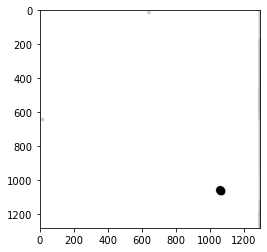

Wall time: 356 ms


In [29]:
%%time
plt.imshow(warped_img,cmap='gray')
cv.imwrite("perspec.png",warped_img)
plt.show()